# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
#it stacks the lat lons next to each other 
lat_lngs = zip(lats, lngs)
# print(list(lat_lngs))
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
#cities 



Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = 'metric'
# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()
#get that object in a cell by itselfg 


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | paka
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | palmas
Processing Record 10 of Set 1 | badger
City not found. Skipping...
Processing Record 11 of Set 1 | nar'yan-mar
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | tual
Processing Record 16 of Set 1 | tsiombe
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | nyurba
Processing Record 20 of Set 1 | andergrove
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1

Processing Record 37 of Set 4 | cargados carajos
City not found. Skipping...
Processing Record 38 of Set 4 | saint-pierre
Processing Record 39 of Set 4 | argo
Processing Record 40 of Set 4 | st. john's
Processing Record 41 of Set 4 | harstad
Processing Record 42 of Set 4 | daru
Processing Record 43 of Set 4 | san patricio
Processing Record 44 of Set 4 | vorkuta
Processing Record 45 of Set 4 | merizo village
Processing Record 46 of Set 4 | araripina
Processing Record 47 of Set 4 | atamanovka
Processing Record 48 of Set 4 | at-bashi
Processing Record 49 of Set 4 | yuzhno-kurilsk
Processing Record 0 of Set 5 | geraldton
Processing Record 1 of Set 5 | burwell
Processing Record 2 of Set 5 | bedong
Processing Record 3 of Set 5 | tweed heads
Processing Record 4 of Set 5 | kavaratti
Processing Record 5 of Set 5 | tura
Processing Record 6 of Set 5 | ghat
Processing Record 7 of Set 5 | satana
Processing Record 8 of Set 5 | tezu
Processing Record 9 of Set 5 | qoryooley
Processing Record 10 of Set

City not found. Skipping...
Processing Record 29 of Set 8 | fada n'gourma
Processing Record 30 of Set 8 | kudahuvadhoo
Processing Record 31 of Set 8 | porto belo
Processing Record 32 of Set 8 | etampes
Processing Record 33 of Set 8 | cabo san lucas
Processing Record 34 of Set 8 | okha
Processing Record 35 of Set 8 | mazamitla
Processing Record 36 of Set 8 | ust'-ordynskiy
Processing Record 37 of Set 8 | samraong
Processing Record 38 of Set 8 | sao tome
Processing Record 39 of Set 8 | poyarkovo
Processing Record 40 of Set 8 | rikaze
Processing Record 41 of Set 8 | muscat
Processing Record 42 of Set 8 | karratha
Processing Record 43 of Set 8 | esmeraldas
Processing Record 44 of Set 8 | barrouallie
Processing Record 45 of Set 8 | nova vicosa
Processing Record 46 of Set 8 | marica
Processing Record 47 of Set 8 | majdal shams
Processing Record 48 of Set 8 | pisco
Processing Record 49 of Set 8 | herval
Processing Record 0 of Set 9 | bol'shoye boldino
Processing Record 1 of Set 9 | vanimo
Pro

Processing Record 15 of Set 12 | la'ie
Processing Record 16 of Set 12 | san rafael
Processing Record 17 of Set 12 | charlottetown
Processing Record 18 of Set 12 | misratah
Processing Record 19 of Set 12 | beloyarskiy
Processing Record 20 of Set 12 | mena
Processing Record 21 of Set 12 | pimentel
Processing Record 22 of Set 12 | wynyard
Processing Record 23 of Set 12 | zalingei
Processing Record 24 of Set 12 | nikolayevsk-on-amure
Processing Record 25 of Set 12 | margate
Processing Record 26 of Set 12 | iskateley
Processing Record 27 of Set 12 | siaton
Processing Record 28 of Set 12 | qir moav
Processing Record 29 of Set 12 | huanta
Processing Record 30 of Set 12 | naters
Processing Record 31 of Set 12 | roosevelt
Processing Record 32 of Set 12 | guanica
Processing Record 33 of Set 12 | ikem
Processing Record 34 of Set 12 | las tablas
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
#get the number of cities 
len(city_data)

556

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,-3.20,66,95,1.79,SJ,1699818106
1,georgetown,5.4112,100.3354,27.79,92,20,1.54,MY,1699817956
2,puerto natales,-51.7236,-72.4875,13.25,47,75,9.77,CL,1699818107
3,yellowknife,62.4560,-114.3525,-5.88,96,100,9.26,CA,1699818108
4,ilulissat,69.2167,-51.1000,-9.99,62,75,0.00,GL,1699818108
5,paka,4.6374,103.4368,24.96,94,63,0.00,MY,1699818108
6,blackmans bay,-43.0167,147.3167,9.74,75,8,0.45,AU,1699818109
7,port-aux-francais,-49.3500,70.2167,5.99,91,100,11.63,TF,1699818110
8,palmas,-10.2128,-48.3603,35.93,38,0,2.06,BR,1699818110
9,nar'yan-mar,67.6713,53.0870,-8.27,94,16,2.68,RU,1699818111


In [31]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,-3.20,66,95,1.79,SJ,1699818106
1,georgetown,5.4112,100.3354,27.79,92,20,1.54,MY,1699817956
2,puerto natales,-51.7236,-72.4875,13.25,47,75,9.77,CL,1699818107
3,yellowknife,62.4560,-114.3525,-5.88,96,100,9.26,CA,1699818108
4,ilulissat,69.2167,-51.1000,-9.99,62,75,0.00,GL,1699818108


In [36]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [37]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,-3.20,66,95,1.79,SJ,1699818106
1,georgetown,5.4112,100.3354,27.79,92,20,1.54,MY,1699817956
2,puerto natales,-51.7236,-72.4875,13.25,47,75,9.77,CL,1699818107
3,yellowknife,62.4560,-114.3525,-5.88,96,100,9.26,CA,1699818108
4,ilulissat,69.2167,-51.1000,-9.99,62,75,0.00,GL,1699818108


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

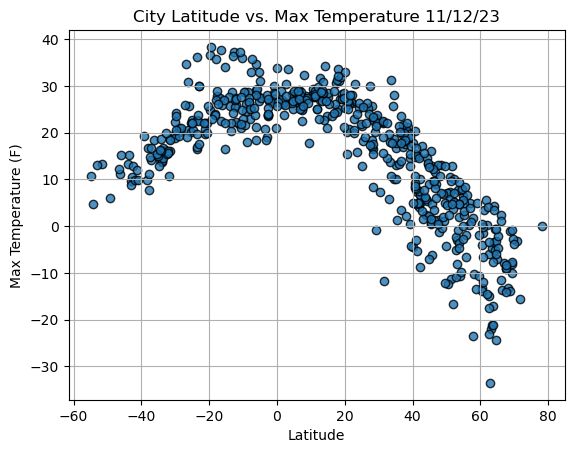

In [39]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

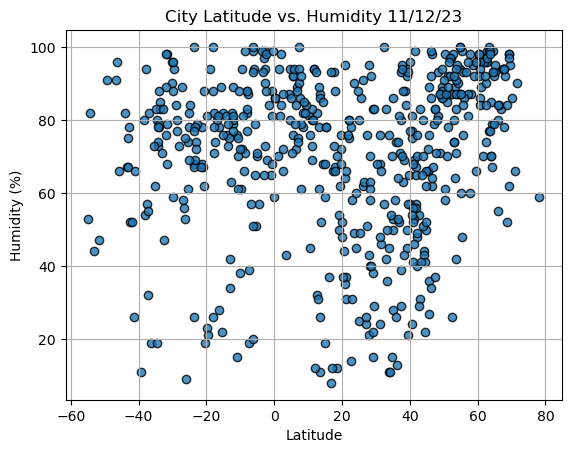

In [40]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

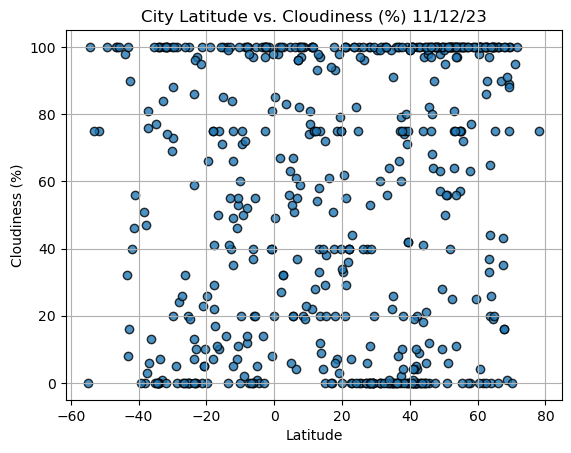

In [41]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

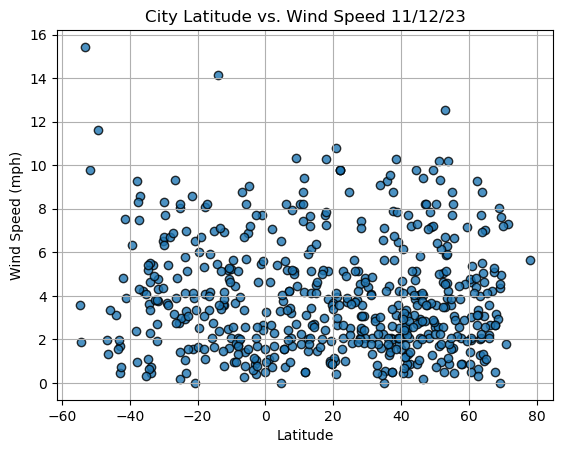

In [42]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,-3.20,66,95,1.79,SJ,1699818106
1,georgetown,5.4112,100.3354,27.79,92,20,1.54,MY,1699817956
3,yellowknife,62.4560,-114.3525,-5.88,96,100,9.26,CA,1699818108
4,ilulissat,69.2167,-51.1000,-9.99,62,75,0.00,GL,1699818108
5,paka,4.6374,103.4368,24.96,94,63,0.00,MY,1699818108


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto natales,-51.7236,-72.4875,13.25,47,75,9.77,CL,1699818107
6,blackmans bay,-43.0167,147.3167,9.74,75,8,0.45,AU,1699818109
7,port-aux-francais,-49.3500,70.2167,5.99,91,100,11.63,TF,1699818110
8,palmas,-10.2128,-48.3603,35.93,38,0,2.06,BR,1699818110
10,invercargill,-46.4000,168.3500,11.12,96,100,1.34,NZ,1699818112


###  Temperature vs. Latitude Linear Regression Plot

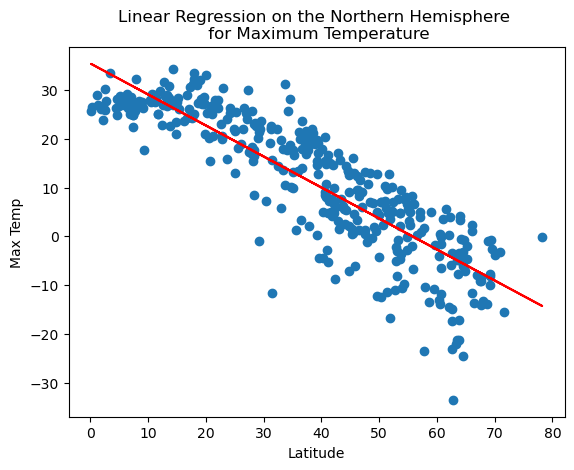

<Figure size 640x480 with 0 Axes>

In [47]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for Maximum Temperature")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(35,70))
#save the figure 
plt.savefig("output_data/Fig5.png")


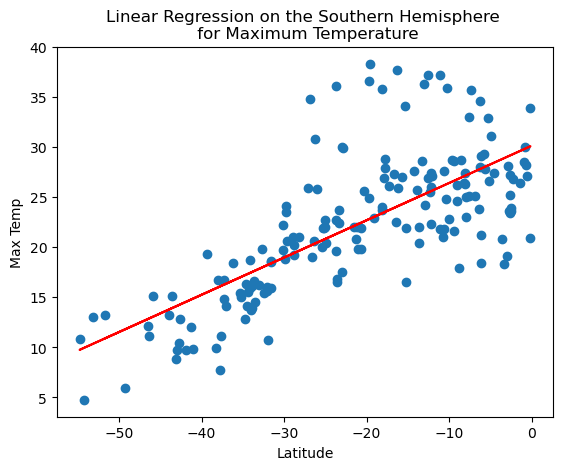

<Figure size 640x480 with 0 Axes>

In [50]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for Maximum Temperature")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

#save the figure 
plt.savefig("output_data/Fig6.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE - will work on this later 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


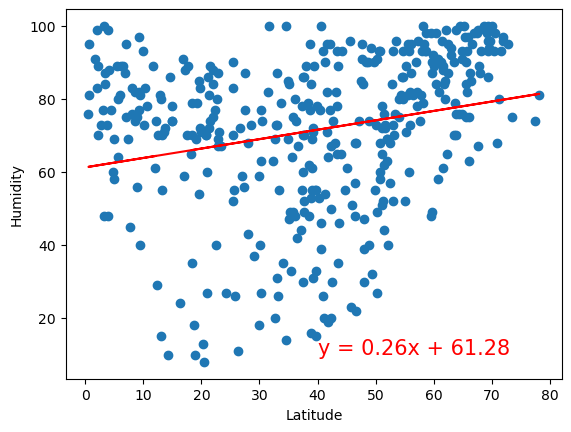

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

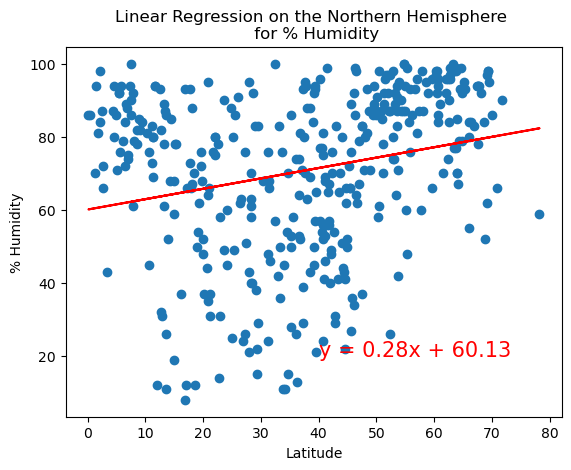

<Figure size 640x480 with 0 Axes>

In [51]:
# Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for % Humidity")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,20))
#safe the figure 
plt.savefig("output_data/Fig7.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE- will work on this later 

### Cloudiness vs. Latitude Linear Regression Plot

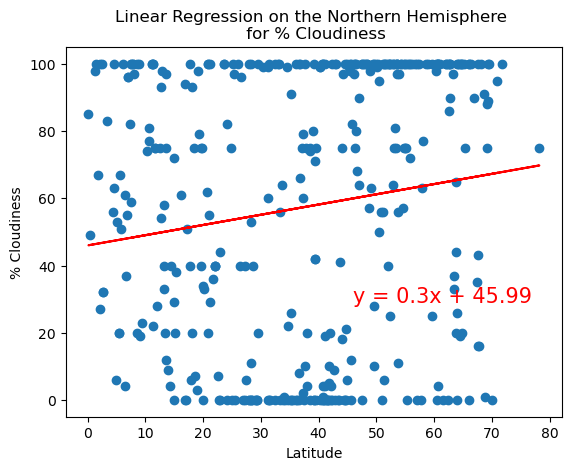

<Figure size 640x480 with 0 Axes>

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for % Cloudiness")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(46,29))
#save the figure 
plt.savefig("output_data/Fig8.png")

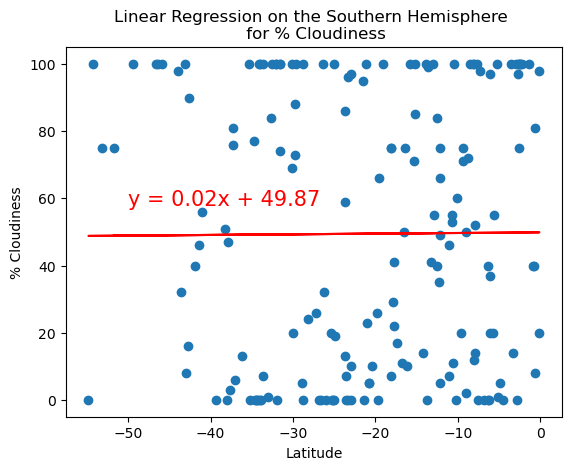

<Figure size 640x480 with 0 Axes>

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for % Cloudiness")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-50,58))

#save the figure 
plt.savefig("output_data/Fig9.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

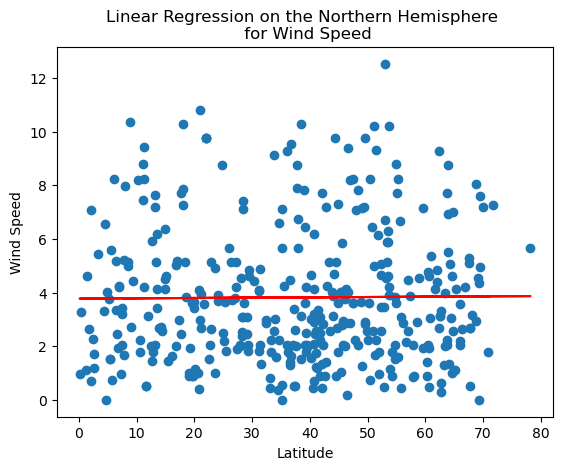

<Figure size 640x480 with 0 Axes>

In [61]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Northern Hemisphere \n for Wind Speed")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(5,33))

#save figure
plt.savefig("output_data/Fig10.png")

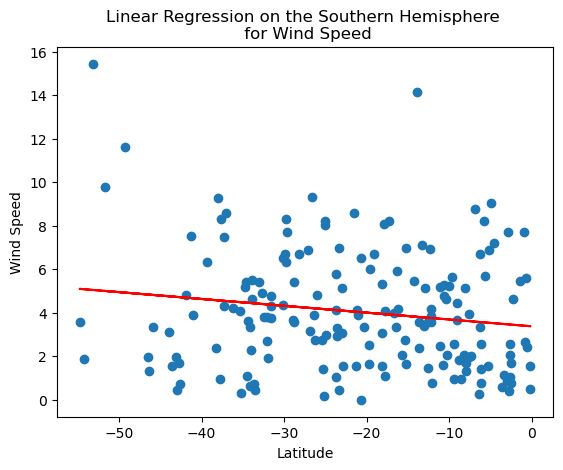

<Figure size 640x480 with 0 Axes>

In [63]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Southern Hemisphere \n for Wind Speed")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-22,29))

#save the data 
plt.savefig("output_data/Fig11.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE- will work on this later 